## Exploratory Data Analysis

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the various datasets available(train and test dataset)
df=pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
#checking shape of dataset
df.shape

(913000, 4)

In [4]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

Here date is an object. We need to convert it to datetime format for further analysis

In [5]:
df['date']=pd.to_datetime(df['date'])

In [6]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [7]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [8]:
#checking for null values in dataset
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

There are no null values present in the dataset

In [9]:
#check max and min date values in dataset
df['date'].min()

Timestamp('2013-01-01 00:00:00')

In [10]:
df['date'].max()

Timestamp('2017-12-31 00:00:00')

In [11]:
#number of unique stores
df['store'].nunique()

10

In [12]:
#number of unique items
df['item'].nunique()

50

### Feature Engineering

In [13]:
#Create new columns based on date column
df['month'] = df['date'].apply(lambda x:x.month_name())
df['day_of_month'] = df['date'].apply(lambda x:x.day)
df['day_of_week'] = df['date'].apply(lambda x:x.day_name())
df['year'] = df['date'].apply(lambda x:x.year)
df['quarter'] = df['date'].apply(lambda x:x.quarter)

In [14]:
df.head()

,date,store,item,sales,month,day_of_month,day_of_week,year,quarter
0,2013-01-01,1,1,13,January,1,Tuesday,2013,1
1,2013-01-02,1,1,11,January,2,Wednesday,2013,1
2,2013-01-03,1,1,14,January,3,Thursday,2013,1
3,2013-01-04,1,1,13,January,4,Friday,2013,1
4,2013-01-05,1,1,10,January,5,Saturday,2013,1


Text(0.5, 1.0, 'Year-wise total sales')

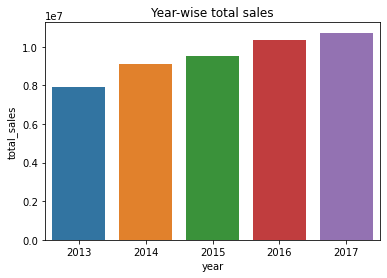

In [15]:
# total sales across all stores for all product for 5 years from 2013-2017
# perform groupby
df1 = df.groupby(['year']).agg(total_sales=("sales", 'sum'))
df1 = df1.reset_index()
# plot barplot
sns.barplot(x="year",
           y="total_sales",
           data=df1)
plt.title('Year-wise total sales')

We can see an overall increase in sales across the years

Text(0.5, 1.0, 'Month-wise average sales')

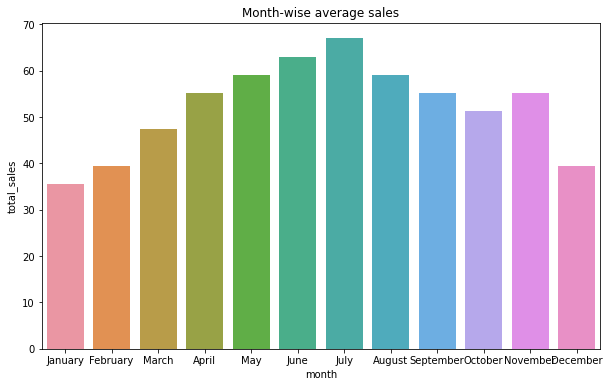

In [16]:
# average sales across all stores for all products across the months for 5 years from 2013-2017
# perform groupby
df1 = df.groupby(['month']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
# plot barplot
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(ax=ax,x="month",
           y="total_sales",
           data=df1,
           order=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'])
plt.title('Month-wise average sales')

The sales increases starting from january and peaks in July and then decreases till december with a slight increase in november 

Text(0.5, 1.0, 'Weekday-wise average sales')

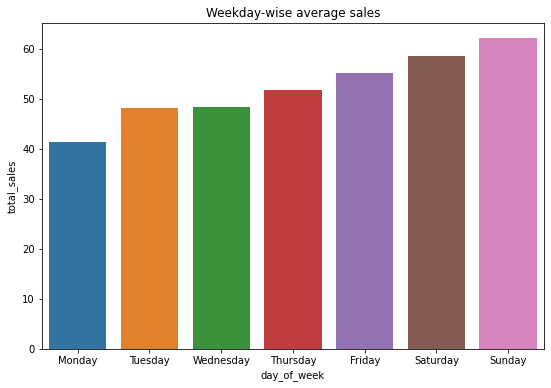

In [17]:
# average sales across all stores for all products across the week days for 5 years from 2013-2017
# perform groupby
df1 = df.groupby(['day_of_week']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
# plot barplot
fig, ax = plt.subplots(figsize=(9,6))
sns.barplot(ax=ax,x="day_of_week",
           y="total_sales",
           data=df1,
           order=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday-wise average sales')

The sales are highest during the weekends. Beginning of week Monday has lowest sales which keeps increasing across the days

Text(0.5, 1.0, 'Quarter-wise average sales')

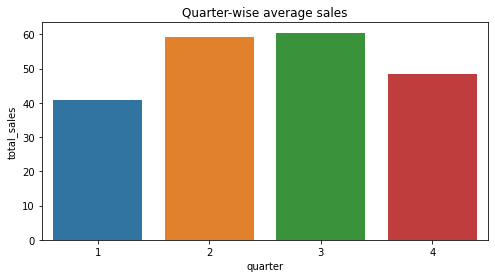

In [18]:
# average sales across all stores for all products across the quarters for 5 years from 2013-2017
# perform groupby
df1 = df.groupby(['quarter']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
# plot barplot
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(ax=ax,x="quarter",
           y="total_sales",
           data=df1)
plt.title('Quarter-wise average sales')

Highest sales observed for 3rd quarter and lowest sales for 1st quarter

Text(0.5, 1.0, 'Day-wise average sales')

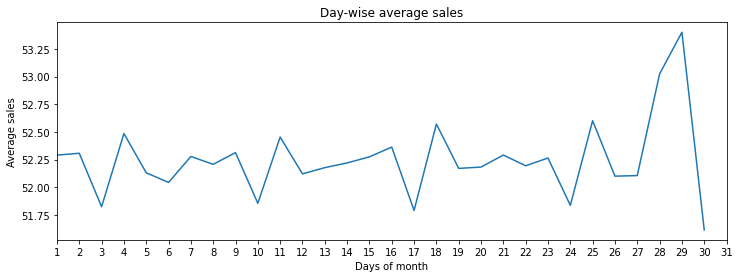

In [25]:
# average sales across all stores for all products across the quarters for 5 years from 2013-2017
# perform groupby
df1 = df.groupby(['day_of_month']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
df1['total_sales'].plot(xlim=[1,31],figsize=(12,4))
plt.xticks(np.arange(min(df1['day_of_month']), max(df1['day_of_month'])+1, 1.0))
plt.xlabel("Days of month")
plt.ylabel("Average sales")
plt.title('Day-wise average sales')

The average sales can be seen peaking towards the end of the month specially 28,29 of month

Text(0.5, 1.0, 'Average sales based on stores')

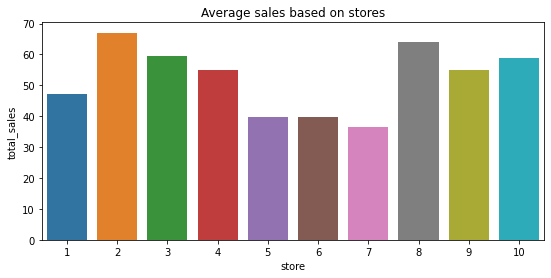

In [22]:
# total sales across each store for all products
# perform groupby
df1 = df.groupby(['store']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
# plot barplot
fig, ax = plt.subplots(figsize=(9,4))
sns.barplot(ax=ax,x="store",
           y="total_sales",
           data=df1)
plt.title('Average sales based on stores')

The highest average sales can be observed for stores 2 and 8 and lowest sales for store 7

Text(0.5, 1.0, 'Item-wise average sales')

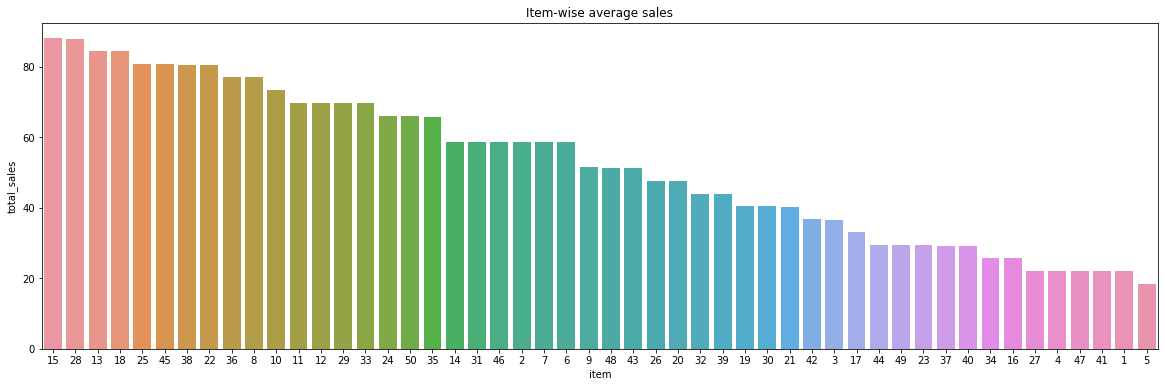

In [23]:
# total sales across each store for all products
# perform groupby
df1 = df.groupby(['item']).agg(total_sales=("sales", 'mean'))
df1 = df1.reset_index()
# plot barplot
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(ax=ax,x="item",
           y="total_sales",
           data=df1,order=df1.sort_values('total_sales',ascending=False).item)
plt.title('Item-wise average sales')

The most sold items include item 15,28 and least sold item is item 5

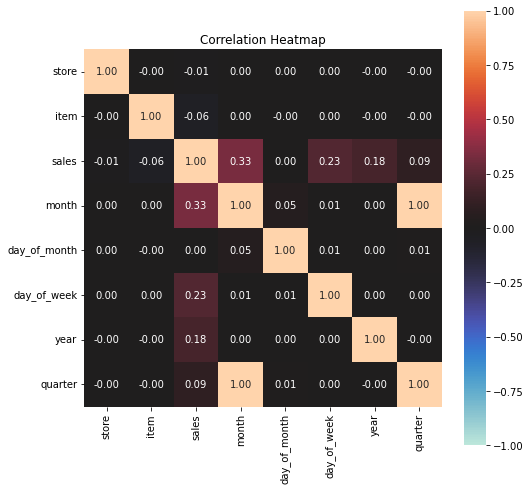

{'corr':                      store          item     sales     month  day_of_month  \
 store         1.000000e+00 -1.185846e-20 -0.008170  0.000000  2.439455e-19   
 item         -1.185846e-20  1.000000e+00 -0.055998  0.000000 -5.810646e-19   
 sales        -8.170361e-03 -5.599807e-02  1.000000  0.330996  2.791264e-03   
 month         0.000000e+00  0.000000e+00  0.330996  1.000000  4.528717e-02   
 day_of_month  2.439455e-19 -5.810646e-19  0.002791  0.045287  1.000000e+00   
 day_of_week   0.000000e+00  0.000000e+00  0.225698  0.007330  6.334926e-03   
 year         -3.426248e-19 -1.029145e-18  0.182360  0.001339  5.841665e-04   
 quarter      -8.978549e-19 -2.018056e-19  0.093867  1.000000  1.252828e-02   
 
               day_of_week          year       quarter  
 store            0.000000 -3.426248e-19 -8.978549e-19  
 item             0.000000 -1.029145e-18 -2.018056e-19  
 sales            0.225698  1.823597e-01  9.386691e-02  
 month            0.007330  1.338857e-03  1.000000e

In [24]:
#Correlation between various factors
from dython import nominal
df1=df.drop(columns=['date'])
nominal.associations(df1, nominal_columns=['month', 'day_of_week'], numerical_columns=['store', 'item', 'sales', 'day_of_month',
 'year', 'quarter'],mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',figsize=(8,8), annot=True,
fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False,
title='Correlation Heatmap')